In [3]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier



import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

In [4]:
df_train = pd.read_csv('train.csv')
df_train.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [5]:
df_test = pd.read_csv('test.csv')
df_test.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [6]:
df = df_train.append(df_test,ignore_index=True)
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [7]:
# shape

df.shape

(129880, 25)

In [8]:
# info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         129880 non-null  int64  
 1   id                                 129880 non-null  int64  
 2   Gender                             129880 non-null  object 
 3   Customer Type                      129880 non-null  object 
 4   Age                                129880 non-null  int64  
 5   Type of Travel                     129880 non-null  object 
 6   Class                              129880 non-null  object 
 7   Flight Distance                    129880 non-null  int64  
 8   Inflight wifi service              129880 non-null  int64  
 9   Departure/Arrival time convenient  129880 non-null  int64  
 10  Ease of Online booking             129880 non-null  int64  
 11  Gate location                      1298

In [9]:
# data types

df.dtypes

Unnamed: 0                             int64
id                                     int64
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure 

In [10]:
# describe

df.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,44158.700000,64940.500000,39.427957,1190.316392,2.728696,3.057599,2.756876,2.976925,3.204774,3.252633,3.441361,3.358077,3.383023,3.350878,3.632114,3.306267,3.642193,3.286326,14.713713,15.091129
std,31207.377062,37493.270818,15.119360,997.452477,1.329340,1.526741,1.401740,1.278520,1.329933,1.350719,1.319289,1.334049,1.287099,1.316252,1.180025,1.266185,1.176669,1.313682,38.071126,38.465650
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16234.750000,32470.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,38963.500000,64940.500000,40.000000,844.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,71433.250000,97410.250000,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [11]:
# dropping irrelevent columns

df.drop(['Unnamed: 0', 'id'], axis=1, inplace=True)


In [12]:
# special characters


# special characters in variables

for feature in [feature for feature in df.columns if feature not in ['Date', 'Time']]:
    print("The feature {} has {} ? in it".format(feature,df[df[feature]=='?'].shape))


The feature Gender has (0, 23) ? in it
The feature Customer Type has (0, 23) ? in it
The feature Age has (0, 23) ? in it
The feature Type of Travel has (0, 23) ? in it
The feature Class has (0, 23) ? in it
The feature Flight Distance has (0, 23) ? in it
The feature Inflight wifi service has (0, 23) ? in it
The feature Departure/Arrival time convenient has (0, 23) ? in it
The feature Ease of Online booking has (0, 23) ? in it
The feature Gate location has (0, 23) ? in it
The feature Food and drink has (0, 23) ? in it
The feature Online boarding has (0, 23) ? in it
The feature Seat comfort has (0, 23) ? in it
The feature Inflight entertainment has (0, 23) ? in it
The feature On-board service has (0, 23) ? in it
The feature Leg room service has (0, 23) ? in it
The feature Baggage handling has (0, 23) ? in it
The feature Checkin service has (0, 23) ? in it
The feature Inflight service has (0, 23) ? in it
The feature Cleanliness has (0, 23) ? in it
The feature Departure Delay in Minutes has

In [13]:
df.replace('nan', 0,inplace = True)

In [14]:
# Missing values
total = df.isnull().sum().sort_values(ascending=False)
percent = ((df.isnull().sum()/df.isnull().count())*100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head()

,Total,Percent
Arrival Delay in Minutes,393,0.302587
Gender,0,0.000000
Seat comfort,0,0.000000
Departure Delay in Minutes,0,0.000000
Cleanliness,0,0.000000


In [15]:
df.dropna(inplace = True)

In [16]:
# Numerical Features


#numerical columnns

numerical_features = df.select_dtypes(include = np.number)
numerical_features.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,13,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0
1,25,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0
2,26,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0
3,25,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0
4,61,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0


In [17]:
len(numerical_features.columns)

18

In [18]:

### Count of unique values in numerical features
for feature in [feature for feature in df.columns if feature not in ['class']]:
  print("Feature {} has {} No. of unique values".format(feature,df[feature].nunique()))

Feature Gender has 2 No. of unique values
Feature Customer Type has 2 No. of unique values
Feature Age has 75 No. of unique values
Feature Type of Travel has 2 No. of unique values
Feature Class has 3 No. of unique values
Feature Flight Distance has 3821 No. of unique values
Feature Inflight wifi service has 6 No. of unique values
Feature Departure/Arrival time convenient has 6 No. of unique values
Feature Ease of Online booking has 6 No. of unique values
Feature Gate location has 6 No. of unique values
Feature Food and drink has 6 No. of unique values
Feature Online boarding has 6 No. of unique values
Feature Seat comfort has 6 No. of unique values
Feature Inflight entertainment has 6 No. of unique values
Feature On-board service has 6 No. of unique values
Feature Leg room service has 6 No. of unique values
Feature Baggage handling has 5 No. of unique values
Feature Checkin service has 6 No. of unique values
Feature Inflight service has 6 No. of unique values
Feature Cleanliness has 6

In [19]:

# caterigorical columns

categorical_features = df.select_dtypes(exclude =np.number)
categorical_features.head()

,Gender,Customer Type,Type of Travel,Class,satisfaction
0,Male,Loyal Customer,Personal Travel,Eco Plus,neutral or dissatisfied
1,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied
2,Female,Loyal Customer,Business travel,Business,satisfied
3,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
4,Male,Loyal Customer,Business travel,Business,satisfied


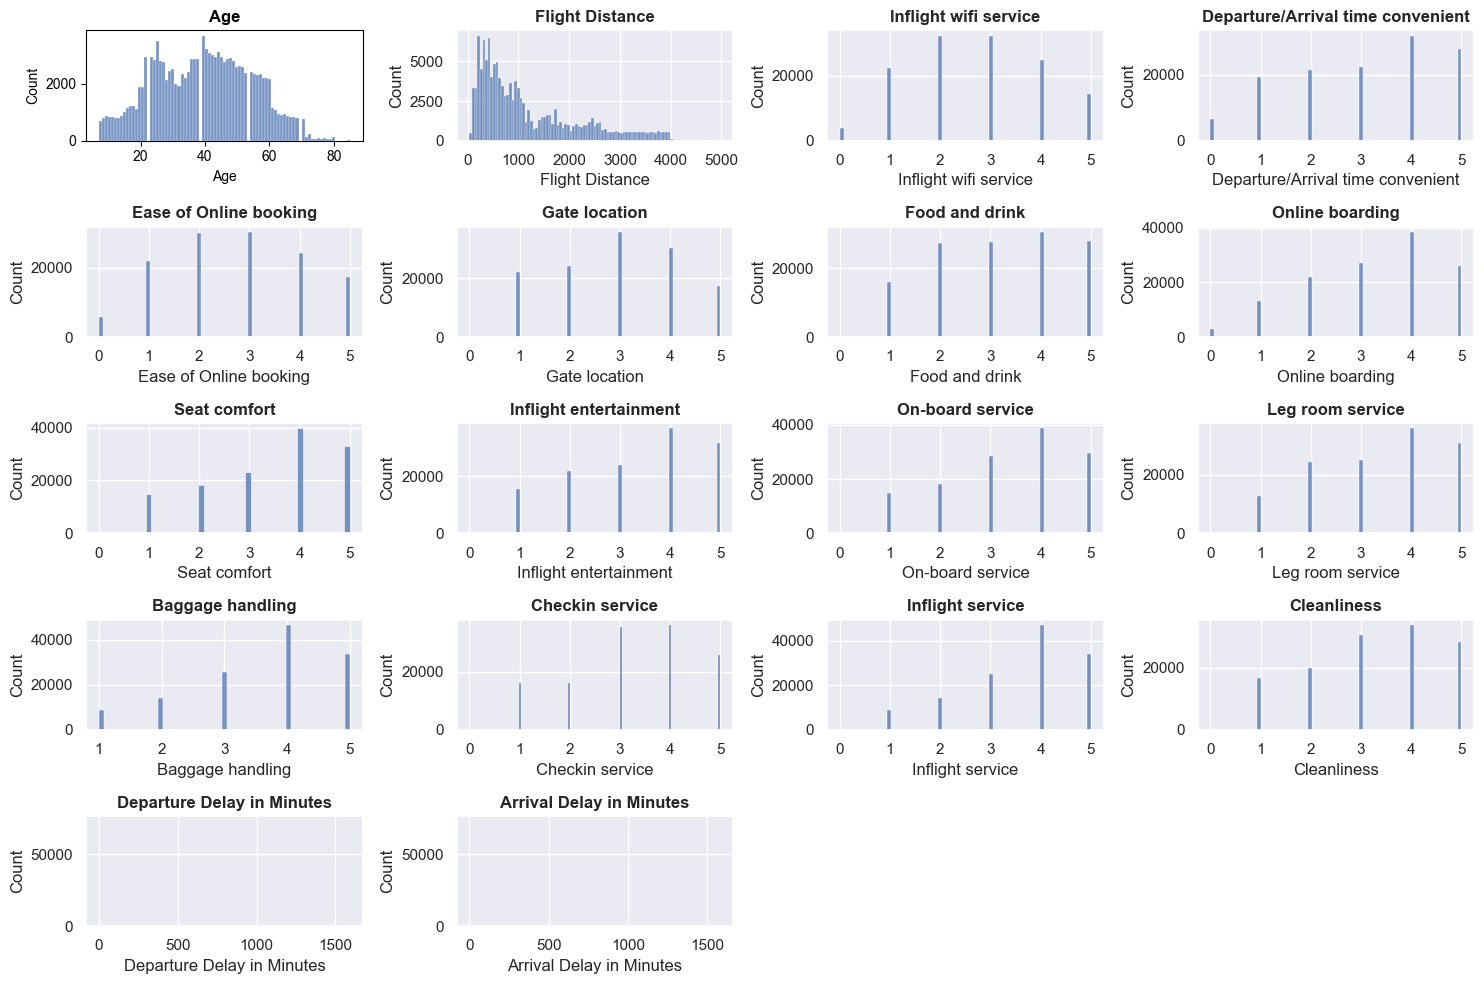

In [20]:
#unvariate analysis

# distribution of Numerical variables

### Checking outliers in numerical features

plt.figure(figsize=(15,10))
for i in enumerate(numerical_features):
    plt.subplot(5, 4, i[0]+1)
    sns.set(rc={'figure.figsize':(10,6)})
    sns.histplot(data=df, x=i[1], palette ='rainbow')
    plt.title("{}".format(i[1]), fontweight="bold")
    plt.tight_layout()
    plt.show

<AxesSubplot:>

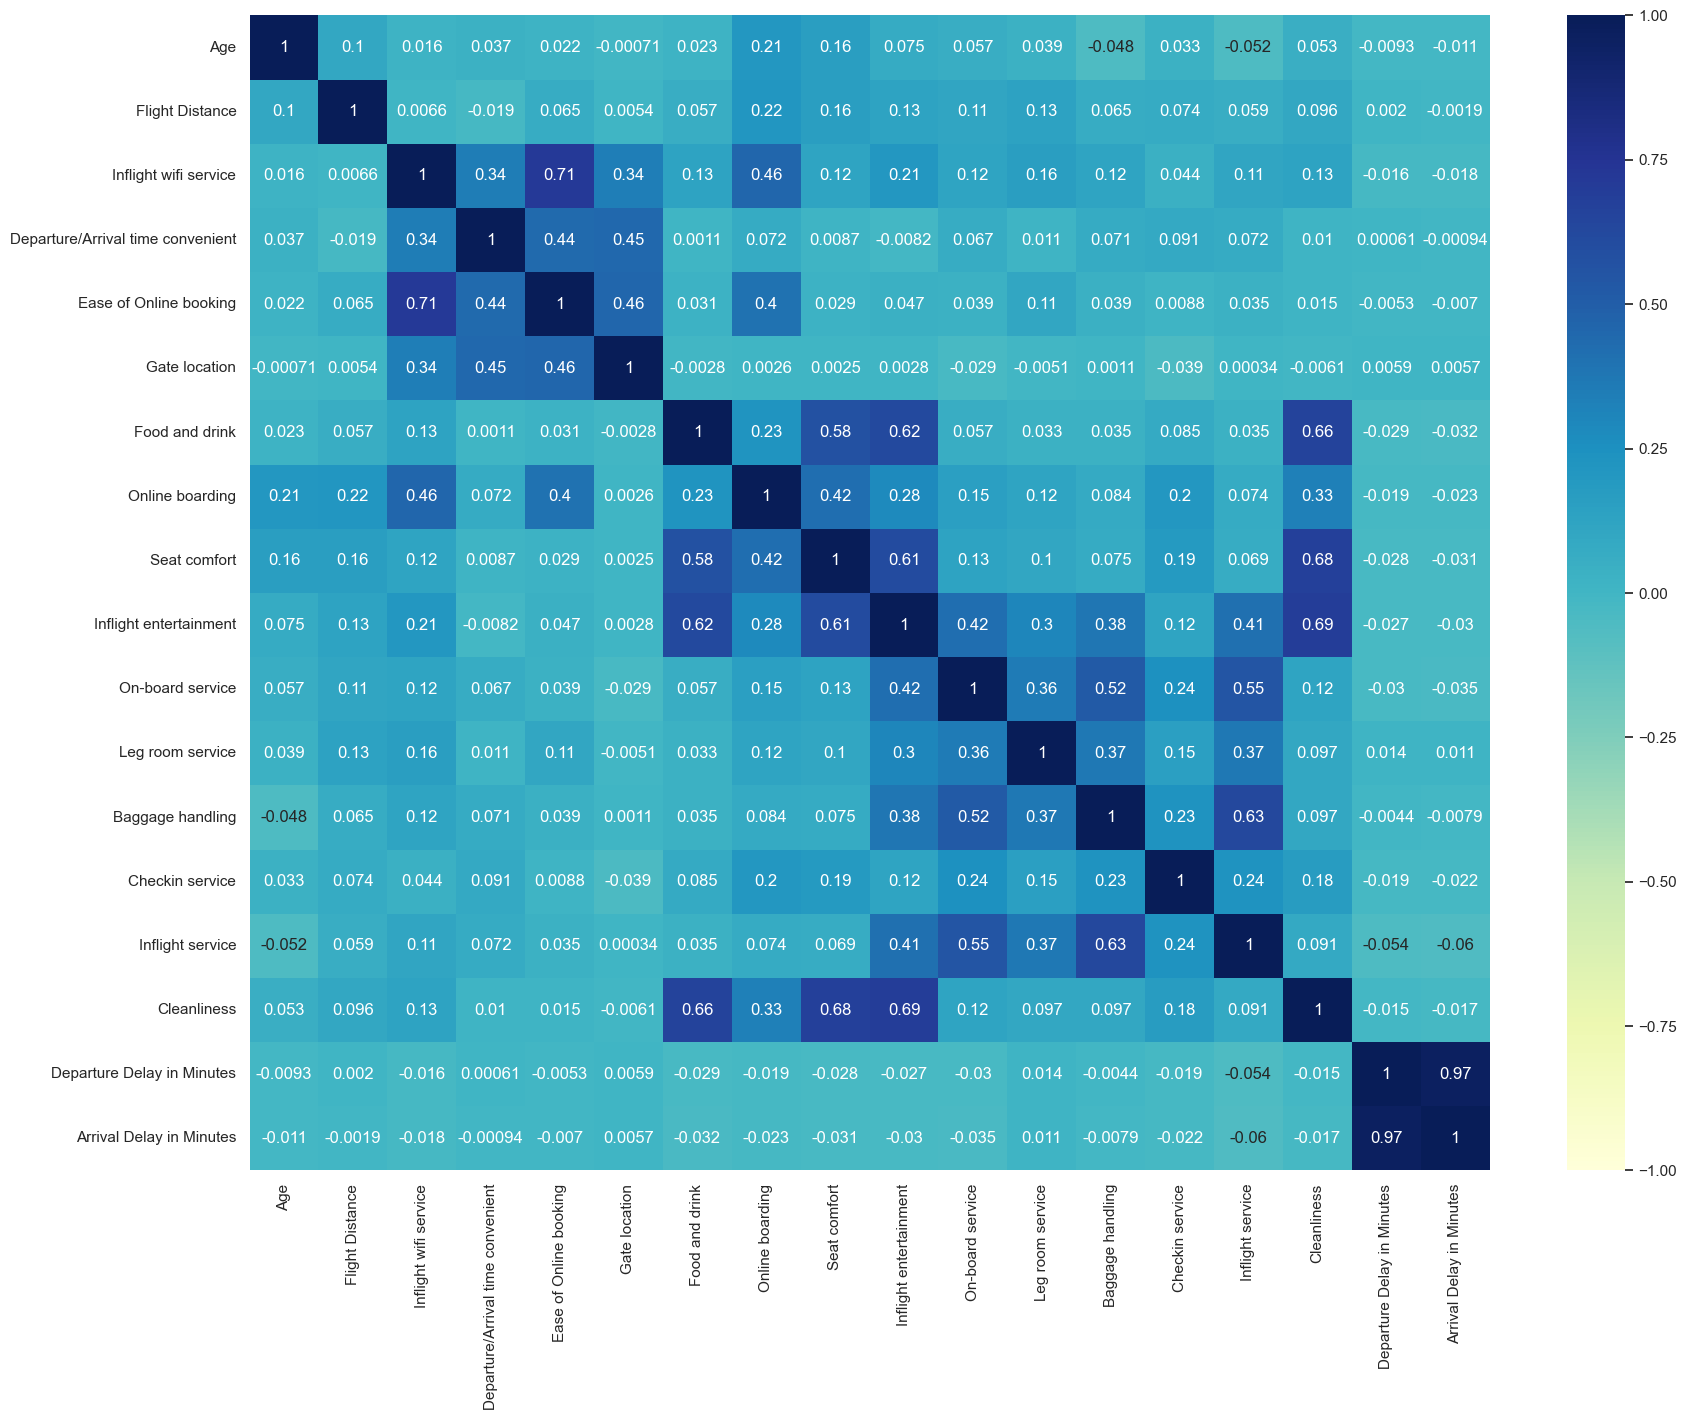

In [21]:

# correlation


### Plotting heatmap for visualising the correlation between features
sns.set(rc={'figure.figsize':(20,15)})
sns.heatmap(df.corr(), annot=True,  vmin=-1, vmax=1, cmap="YlGnBu")

In [22]:

# correlation features



def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [23]:


corr_features = correlation(df, 0.75)
len(set(corr_features))
     

1

In [24]:

corr_features

{'Arrival Delay in Minutes'}

In [25]:


total = df.isnull().sum().sort_values(ascending=False)
percent = ((df.isnull().sum()/df.isnull().count())*100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head()
    

,Total,Percent
Gender,0,0.0
Seat comfort,0,0.0
Arrival Delay in Minutes,0,0.0
Departure Delay in Minutes,0,0.0
Cleanliness,0,0.0


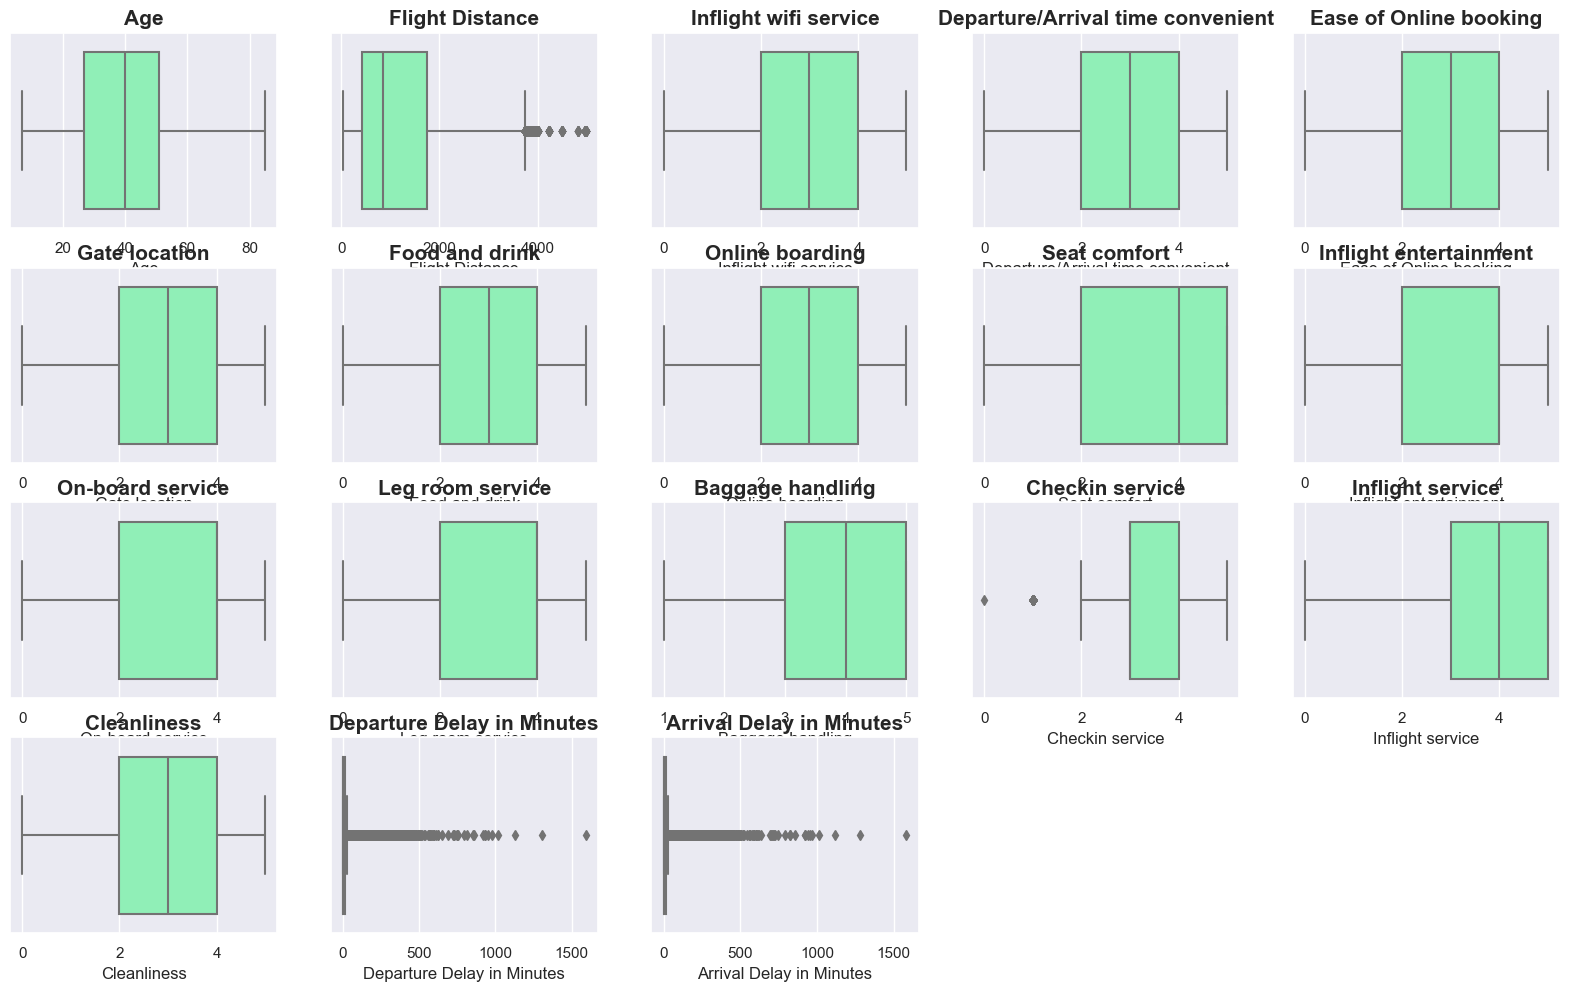

In [26]:

# #outliers

### Checking outliers in numerical features

plt.figure(figsize=(20,30))
for feature in enumerate(numerical_features):
    plt.subplot(10, 5, feature[0]+1)
    sns.set(rc={'figure.figsize':(10,6)})
    sns.boxplot(data=df, x=feature[1], palette = 'rainbow')
    plt.title("{}".format(feature[1]), fontweight="bold", fontsize=15)

In [27]:
### Function to Cap Outlier
def remove_outliers(in_data, in_col):
    # Finding the IQR
    first_quartile = in_data[in_col].quantile(0.25)
    third_quartile = in_data[in_col].quantile(0.75)
    iqr = third_quartile - first_quartile
    upper_limit = third_quartile + 1.5 * iqr
    lower_limit = first_quartile - 1.5 * iqr
    in_data.loc[(in_data[in_col]>upper_limit), in_col]= upper_limit
    in_data.loc[(in_data[in_col]<lower_limit), in_col]= lower_limit    
    return in_data


In [28]:


### Capping outliers from numerical features
for feature in numerical_features:
    
    dataset=remove_outliers(df, feature)

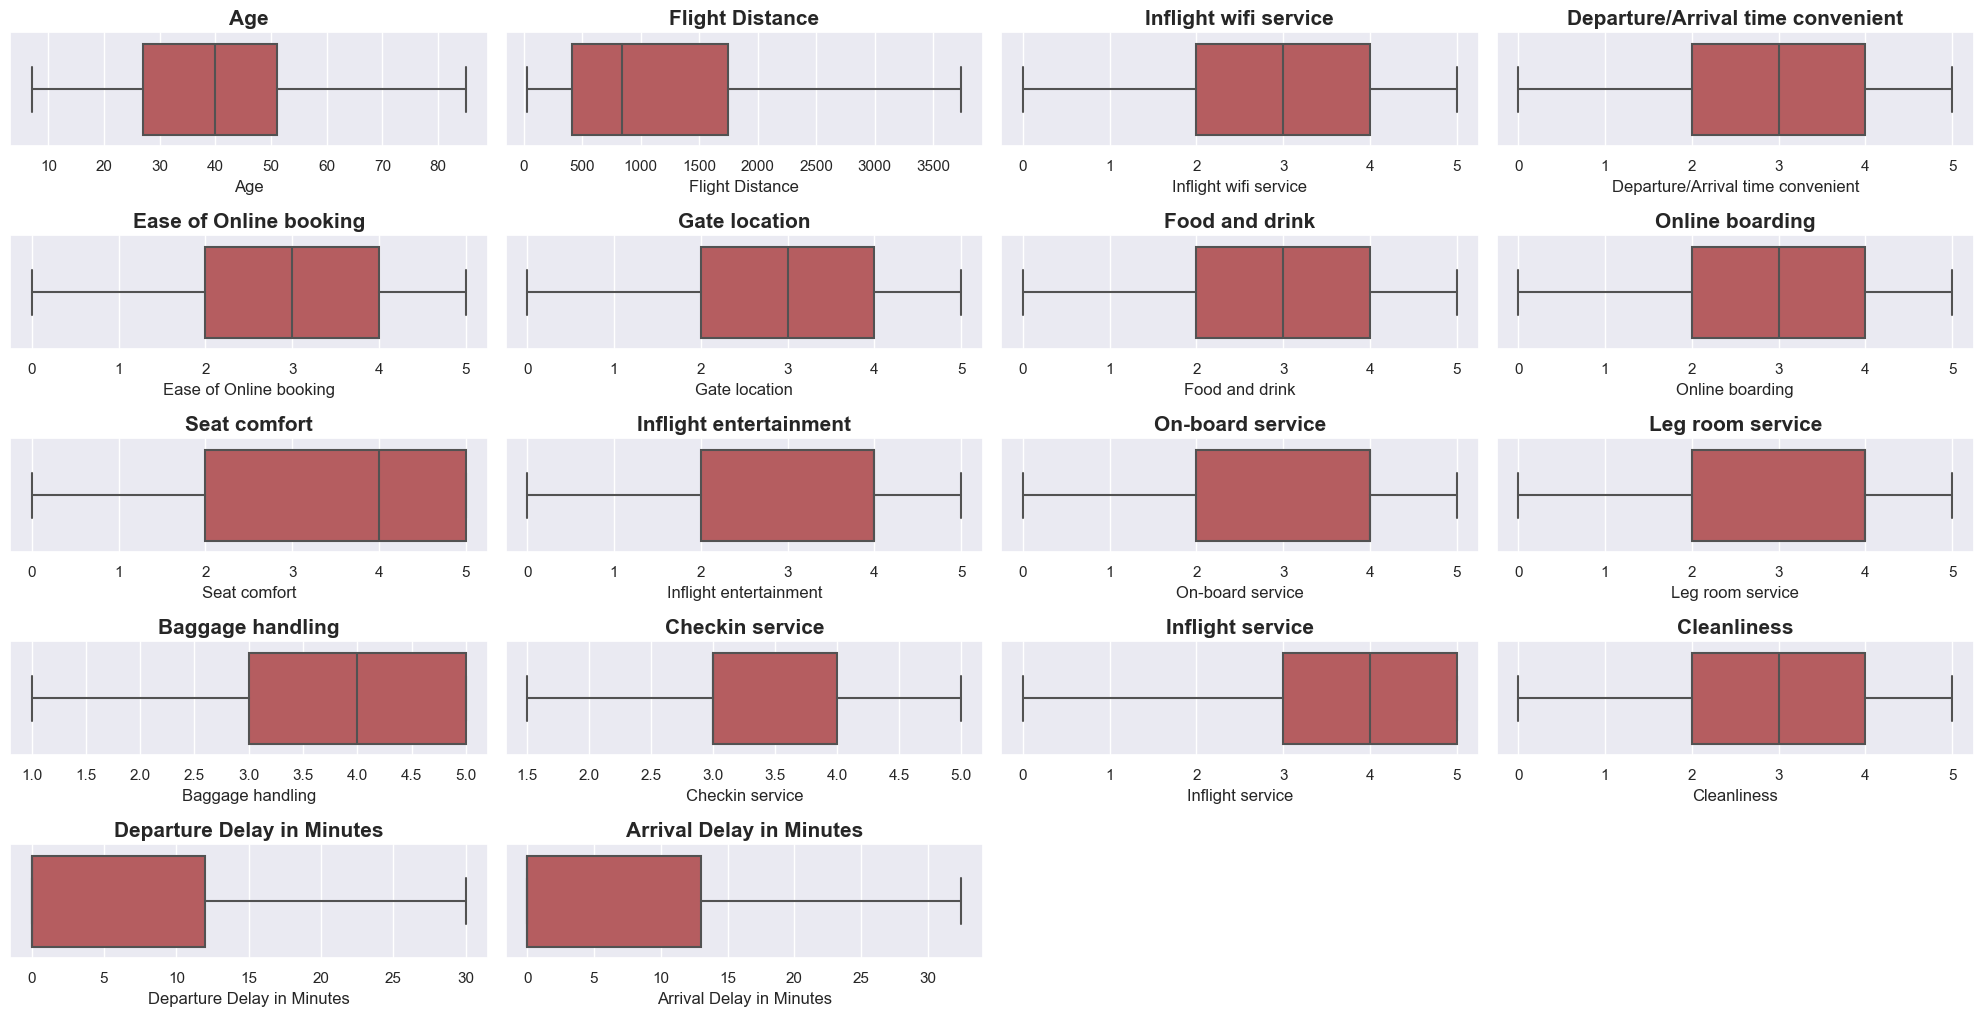

In [29]:



### Checking outliers in numerical features after capping

plt.figure(figsize=(20,20))
for feature in enumerate(numerical_features):
    plt.subplot(10, 4, feature[0]+1)
    sns.set(rc={'figure.figsize':(10,6)})
    sns.boxplot(data=df, x=feature[1], color='r')
    plt.title("{}".format(feature[1]), fontweight="bold", fontsize=15)
    plt.tight_layout()


In [30]:
# Encoding Categorical variables
categorical_features.columns

Index(['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction'], dtype='object')

In [31]:
df["Gender"] = df["Gender"].map({"Male":1,"Female":0})
df["Customer Type"] = df["Customer Type"].map({"Loyal Customer":1,"disloyal Customer":0})
df['Class'] =df['Class'].map({'Business':1,'Eco':2,'Eco Plus':3})
df["Type of Travel"] = df["Type of Travel"].map({"Business travel":1,"Personal Travel":0})
df['satisfaction'] = df['satisfaction'].map({'neutral or dissatisfied':0,'satisfied':1})

In [32]:
df.dtypes

Gender                                 int64
Customer Type                          int64
Age                                    int64
Type of Travel                         int64
Class                                  int64
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                         float64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                      float64
Inflight service                       int64
Cleanliness                            int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
satisfacti

In [33]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]
X.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,1,13,0,3,460,3,4,3,1,...,5.0,5,4,3,4,4.0,5,5,25,18.0
1,1,0,25,1,1,235,3,2,3,3,...,1.0,1,1,5,3,1.5,4,1,1,6.0
2,0,1,26,1,1,1142,2,2,2,2,...,5.0,5,4,3,4,4.0,4,5,0,0.0
3,0,1,25,1,1,562,2,5,5,5,...,2.0,2,2,5,3,1.5,4,2,11,9.0
4,1,1,61,1,1,214,3,3,3,3,...,5.0,3,3,4,4,3.0,3,3,0,0.0


In [34]:

### train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=19)

In [35]:
X_train.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
105369,0,1,34,1,1,2974,4,2,4,4,...,4.0,4,4,4,4,5.0,4,4,0,0.0
111887,0,1,48,1,1,214,4,4,4,4,...,5.0,5,5,5,5,3.0,5,3,0,3.0
116118,1,1,36,0,2,1504,4,5,4,5,...,1.0,1,3,5,3,3.0,5,1,3,8.0
29612,1,1,27,0,2,719,2,5,2,4,...,4.0,4,4,3,5,4.0,4,4,0,0.0
61343,1,0,39,1,2,790,4,4,4,3,...,2.0,2,4,1,4,4.0,5,2,23,0.0


In [36]:
y_train.head()

105369    1
111887    1
116118    0
29612     0
61343     1
Name: satisfaction, dtype: int64

In [37]:
X_test.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
120344,0,0,42,1,2,191,4,2,4,4,...,2.0,4,4,3,4,1.5,3,4,0,3.0
111730,0,1,29,1,1,1670,4,2,2,2,...,4.0,4,4,3,1,4.0,2,4,30,32.5
25109,1,1,47,1,2,750,4,1,4,1,...,4.0,4,4,3,1,1.5,1,4,0,0.0
65381,1,1,37,0,2,471,3,5,3,5,...,5.0,5,1,3,3,5.0,3,5,0,0.0
90508,1,1,51,1,2,1269,4,1,1,1,...,4.0,4,4,5,3,1.5,3,4,30,32.5


In [38]:
y_test.head()

120344    0
111730    0
25109     1
65381     0
90508     0
Name: satisfaction, dtype: int64

In [39]:

X_train.shape, y_train.shape

((97115, 22), (97115,))

In [40]:

X_test.shape, y_test.shape

((32372, 22), (32372,))

In [41]:


scalar=StandardScaler()
scalar

StandardScaler()

In [42]:


X_train=scalar.fit_transform(X_train)
X_train
     

array([[-0.98443862,  0.47281891, -0.36103584, ...,  0.54315877,
        -0.65757727, -0.66133451],
       [-0.98443862,  0.47281891,  0.56467073, ..., -0.21884377,
        -0.65757727, -0.41077468],
       [ 1.01580736,  0.47281891, -0.22879205, ..., -1.74284887,
        -0.38905415,  0.00682505],
       ...,
       [-0.98443862,  0.47281891,  1.4242554 , ..., -0.21884377,
        -0.65757727, -0.66133451],
       [ 1.01580736,  0.47281891,  0.69691452, ...,  1.30516132,
        -0.65757727, -0.66133451],
       [ 1.01580736,  0.47281891, -1.35286431, ...,  0.54315877,
        -0.65757727,  0.42442477]])

In [43]:

X_test=scalar.transform(X_test)
X_test
     

array([[-0.98443862, -2.11497463,  0.16793934, ...,  0.54315877,
        -0.65757727, -0.41077468],
       [-0.98443862,  0.47281891, -0.69164533, ...,  0.54315877,
         2.02765395,  2.05306369],
       [ 1.01580736,  0.47281891,  0.49854883, ...,  0.54315877,
        -0.65757727, -0.66133451],
       ...,
       [-0.98443862, -2.11497463, -1.08837672, ..., -0.98084632,
        -0.65757727, -0.66133451],
       [ 1.01580736,  0.47281891, -0.09654825, ...,  1.30516132,
        -0.65757727, -0.66133451],
       [ 1.01580736,  0.47281891, -1.41898621, ..., -1.74284887,
        -0.65757727, -0.66133451]])

In [44]:
import sklearn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, ExtraTreesClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
### To be able to see maximum columns on screen
pd.set_option('display.max_columns', 500)

In [45]:
models={
 "Logistic Regression":LogisticRegression(),
 #"Support Vector Classifier":SVC(),
 "Decision Tree Classifier":DecisionTreeClassifier(),
 "Random Forest Classifier":RandomForestClassifier(),
 "Bagging Classifier": BaggingClassifier(base_estimator=LogisticRegression()),
 "Extra Tree Classifier": ExtraTreesClassifier(),
 "AdaBoost Classifier": AdaBoostClassifier(),
 "GradientBoost Classifier": GradientBoostingClassifier(),
 "XGBoost Classifier": XGBClassifier()
}


In [46]:
def model_trainer(model, X_train_data, y_train_data, X_test_data):
 """
 This function takes model object, X train data, y train data, and 
 X test data as argument, trains model and gives prediction for train data 
 and prediction for test data.
 """
 model.fit(X_train_data, y_train_data)
 y_train_pred=model.predict(X_train_data)
 pred_val=model.predict(X_test_data)
 return y_train_pred, pred_val

In [47]:
def model_evaluator(actual_val, pred_val):

 acc=round(accuracy_score(actual_val, pred_val),5)
 prec=round(precision_score(actual_val, pred_val),5)
 rec=round(recall_score(actual_val, pred_val),5)
 roc_auc=round(roc_auc_score(actual_val, pred_val),5)
 return acc, prec, rec, roc_auc


In [48]:
### Creating empty list to store model names
model_list=[]
### creating empty list to store accuracy score for each model
acc_score_list=[]
### creating empty list for storing precision score
prec_score_list=[]
### creating list to store recall score
recall_list=[]
### creating list to store roc_auc score
roc_auc_list=[]

### Training all models and getting their performance and storing it in empty list
for num in range(len(list(models))):
    ### selecting model
    model=list(models.values())[num]
    
    ### getting training data prediction and test data prediction
    y_pred, pred_val=model_trainer(model,X_train, y_train, X_test)
    
    ### Getting model performance parameters for training data
    acc_score, prec_score, rec_score, roc_auc=model_evaluator(y_train,y_pred )
    print("{} Model\n".format(list(models.keys())[num]))
    print("Model Performance for training dataset")
    print("Accuracy score: {}\nPrecision Score: {}\nRecall Score: {}\nRoc_Auc Score: {}".format(acc_score,prec_score, rec_score, roc_auc))
    print("-"*50)
    
    ### Getting model performance parameters for test data
    acc_score, prec_score, rec_score, roc_auc=model_evaluator(y_test,pred_val)
    print("Model Performance for Test dataset")
    print("Accuracy score: {}\nPrecision Score: {}\nRecall Score: {}\nRoc_Auc Score: {}".format(acc_score,prec_score, rec_score, roc_auc))
    
    ### Appending model name and Performance score in seperate list so that models can be sorted in terms of performance
    model_list.append(list(models.keys())[num])
    acc_score_list.append(acc_score)
    prec_score_list.append(prec_score)
    recall_list.append(rec_score)
    roc_auc_list.append(roc_auc)
    print("*"*50)
    print("\n")

Logistic Regression Model

Model Performance for training dataset
Accuracy score: 0.8752
Precision Score: 0.87095
Recall Score: 0.83631
Roc_Auc Score: 0.87066
--------------------------------------------------
Model Performance for Test dataset
Accuracy score: 0.87248
Precision Score: 0.8713
Recall Score: 0.83034
Roc_Auc Score: 0.86772
**************************************************


Decision Tree Classifier Model

Model Performance for training dataset
Accuracy score: 1.0
Precision Score: 1.0
Recall Score: 1.0
Roc_Auc Score: 1.0
--------------------------------------------------
Model Performance for Test dataset
Accuracy score: 0.9456
Precision Score: 0.93694
Recall Score: 0.93846
Roc_Auc Score: 0.94479
**************************************************


Random Forest Classifier Model

Model Performance for training dataset
Accuracy score: 0.99999
Precision Score: 1.0
Recall Score: 0.99998
Roc_Auc Score: 0.99999
--------------------------------------------------
Model Performanc

c:\Users\91822\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:33:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost Classifier Model

Model Performance for training dataset
Accuracy score: 0.97703
Precision Score: 0.98555
Recall Score: 0.96115
Roc_Auc Score: 0.97517
--------------------------------------------------
Model Performance for Test dataset
Accuracy score: 0.96367
Precision Score: 0.97269
Recall Score: 0.94321
Roc_Auc Score: 0.96136
**************************************************




In [49]:
### Tabulating model performance in dataframe
model_perf=pd.DataFrame(list(zip(model_list, acc_score_list,prec_score_list, recall_list, roc_auc_list)), columns=['Model', 'Accuracy', 'Precision', 'Recall', 'Roc_Auc Score']).sort_values(by=['Accuracy'], ascending=False,).reset_index()
model_perf.drop('index', axis=1, inplace=True)
model_perf

,Model,Accuracy,Precision,Recall,Roc_Auc Score
0,XGBoost Classifier,0.96367,0.97269,0.94321,0.96136
1,Random Forest Classifier,0.96163,0.97270,0.93839,0.95901
2,Extra Tree Classifier,0.96009,0.97051,0.93698,0.95748
3,Decision Tree Classifier,0.94560,0.93694,0.93846,0.94479
4,GradientBoost Classifier,0.94103,0.94343,0.91998,0.93865
5,AdaBoost Classifier,0.92444,0.91952,0.90610,0.92237
6,Bagging Classifier,0.87282,0.87146,0.83104,0.86810
7,Logistic Regression,0.87248,0.87130,0.83034,0.86772


In [50]:
rf_model = RandomForestClassifier(n_estimators=50, max_features="auto", random_state=44)
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50, random_state=44)

In [51]:
predictions = rf_model.predict(X_test)
predictions

array([0, 0, 1, ..., 1, 1, 0], dtype=int64)

In [52]:


import pickle

pickle.dump(rf_model,open('rf.pkl','wb'))

In [53]:
pickled_model = pickle.load(open('rf.pkl','rb'))
     

In [54]:

pickled_model.predict(scalar.transform(X_train[0].reshape(1,-1)))

array([0], dtype=int64)

In [55]:

# scaling


pickle.dump(scalar,open('scaler.pkl','wb'))


In [56]:
y_train[0]

0